In [42]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plot

In [118]:
data = pd.read_csv("ProductionExport.csv")

# Discussion:
#
#    For the years 1949 to 1966, the international production,
#    the stock, the domestic consumption and the level of
#    imports were noted in millions of French francs.
#
#    There are 18 rows of data.  The data include:
#
#      I,  the index;
#      Y,  the year;
#      A0, 1;
#      A1, the international production;
#      A2, the stock;
#      A3, the domestic consumption;
#      B,  the levels of imports.
#
#    We seek a model of the form:
#
#      B = A0 * X0 + A1 * X1 + A2 * X2 + A3 * X3.

In [119]:
data.head()

,Index,Year,One,InternationalProduction,Stock,DomesticConsumption,Imports
0,1,1949,1,149.3,4.2,108.1,15.9
1,2,1950,1,161.2,4.1,114.8,16.4
2,3,1951,1,171.5,3.1,123.2,19.0
3,4,1952,1,175.5,3.1,126.9,19.1
4,5,1953,1,180.8,1.1,132.1,18.8


In [45]:
data.drop(labels = ["Index", "One"], inplace=True, axis=1 )

In [46]:
data.head()

,Year,InternationalProduction,Stock,DomesticConsumption,Imports
0,1949,149.3,4.2,108.1,15.9
1,1950,161.2,4.1,114.8,16.4
2,1951,171.5,3.1,123.2,19.0
3,1952,175.5,3.1,126.9,19.1
4,1953,180.8,1.1,132.1,18.8


<AxesSubplot:>

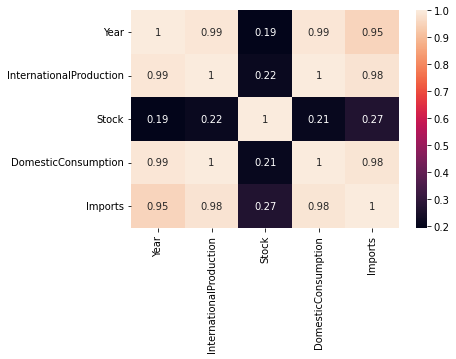

In [47]:
sns.heatmap(data.corr(), annot=True)

In [48]:
#looks like there is no correlation of "stock" with any other dependent variables

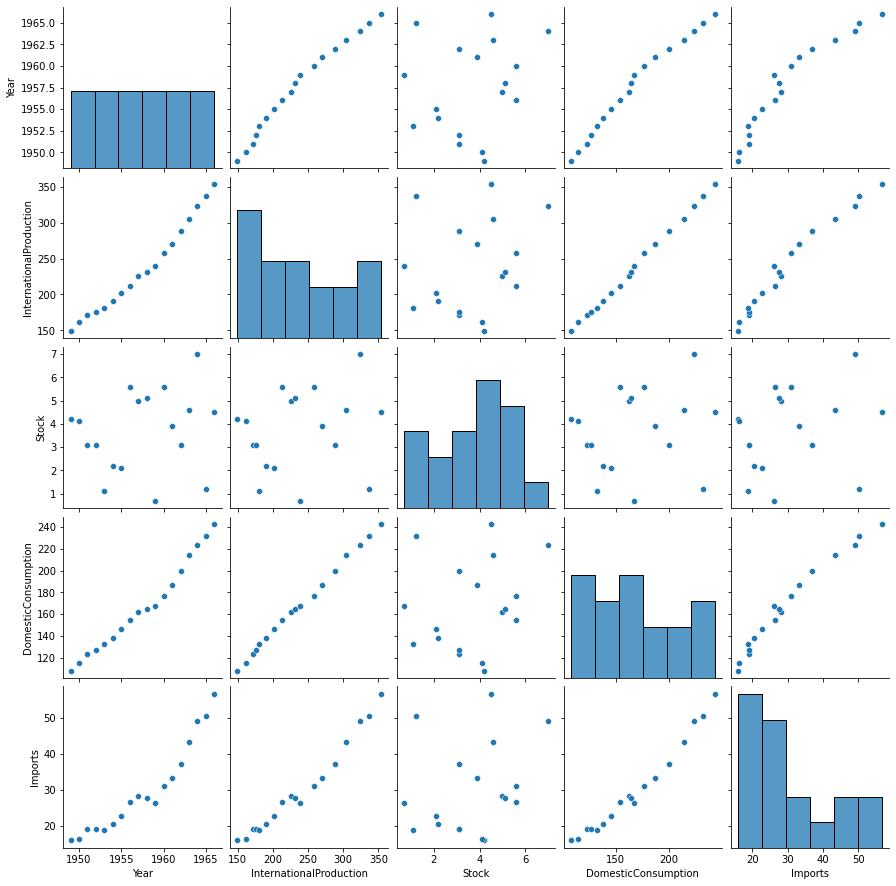

In [49]:
sns.pairplot(data)

In [50]:
#Pair plot confirms that there is no dependeny on "stocks" that influences "imports"
data.drop(labels = ["Stock"], inplace=True, axis=1 )

In [51]:
data.head()

,Year,InternationalProduction,DomesticConsumption,Imports
0,1949,149.3,108.1,15.9
1,1950,161.2,114.8,16.4
2,1951,171.5,123.2,19.0
3,1952,175.5,126.9,19.1
4,1953,180.8,132.1,18.8


In [52]:
#Seperating dependent and independent variables
X = data.loc[:, ["Year", "InternationalProduction", "DomesticConsumption"]]

In [72]:
y = data.loc[:, "Imports"]

In [83]:
from sklearn.model_selection import train_test_split

In [84]:
train_X, test_X, train_y, test_y = train_test_split(X, y, test_size=0.3)

In [85]:
print(train_X.shape, test_X.shape, train_y.shape, test_y.shape)

(12, 3) (6, 3) (12,) (6,)


In [76]:
from sklearn.linear_model import LinearRegression

In [77]:
lrObj = LinearRegression()

In [78]:
lrObj.fit(train_X, train_y)

LinearRegression()

In [79]:
predicted_imports = lrObj.predict(test_X)

In [88]:
pd.DataFrame({"predicted imports": predicted_imports, "Actual Imports":test_y})

,predicted imports,Actual Imports
4,26.220934,18.8
0,17.572702,15.9
3,25.541311,19.1
16,51.302042,50.3
7,29.237477,26.5
1,20.015028,16.4


In [93]:
from sklearn.metrics import mean_absolute_error, r2_score

In [92]:
mean_absolute_error(predicted_imports, test_y)

3.814915760447851

In [95]:
r2_score(predicted_imports, test_y)

0.8333494304390496

In [96]:
lrObj.coef_ #  B = A0 * X0 + A1 * X1 + A2 * X2 + A3 * X3.

array([-3.16848882,  0.09320793,  0.55366348])

In [97]:
lrObj.intercept_ # X3

6117.540218277618

In [100]:
#Testing the model with known data
lrObj.predict([[1949, 149.3, 108.1]])

array([15.92247142])

In [114]:
#Testing the model with unknown data
lrObj.predict([[2000, 500.3, 500.1]])

array([104.08160783])